In [1]:
# Imports
import numpy as np
import matplotlib
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
# %matplotlib notebook
## use `%matplotlib notebook` for interactive figures
plt.style.use('ggplot')

import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb

In [2]:
df = pd.read_csv('data/predictive-maintenance-dataset.csv')
df = df.iloc[:2000, :]

To start investigating we choos a device with a failure after certain time:

In [3]:
df.drop(['ID'], axis=1, inplace=True)
df.dropna(inplace=True)
var_names = df.columns

In [4]:
numpy_data = df.to_numpy(dtype='float64')
numpy_data

array([[9.37440000e+01, 7.39990000e+01, 1.80000000e+01, ...,
        1.26682793e+00, 8.78793754e+03, 5.47585200e+03],
       [9.37400000e+01, 7.39990000e+01, 1.80000000e+01, ...,
        1.26677387e+00, 8.78718760e+03, 5.47585200e+03],
       [9.37360000e+01, 7.39980000e+01, 1.80000000e+01, ...,
        1.26673694e+00, 8.78643770e+03, 5.47570400e+03],
       ...,
       [8.60380000e+01, 7.33500000e+01, 2.00000000e+01, ...,
        1.17297887e+00, 7.40253744e+03, 5.38022250e+03],
       [8.60340000e+01, 7.33500000e+01, 2.00000000e+01, ...,
        1.17292434e+00, 7.40184916e+03, 5.38022250e+03],
       [8.60300000e+01, 7.33490000e+01, 2.00000000e+01, ...,
        1.17288579e+00, 7.40116090e+03, 5.38007580e+03]])

In [5]:
dataframe = pp.DataFrame(numpy_data, var_names=var_names);

In [6]:
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe,
    cond_ind_test=parcorr,
    verbosity=1
)

In [7]:
tau_max = 3
pc_alpha = None
pcmci.verbosity = 0

results = pcmci.run_pcmci(tau_min=0, tau_max=tau_max, pc_alpha=pc_alpha)

In [8]:
results.keys()

dict_keys(['graph', 'p_matrix', 'val_matrix', 'conf_matrix'])

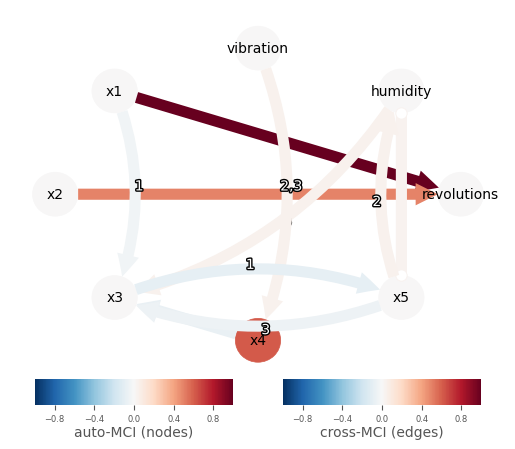

In [8]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='cross-MCI (edges)',
    node_colorbar_label='auto-MCI (nodes)',
    ); plt.savefig()

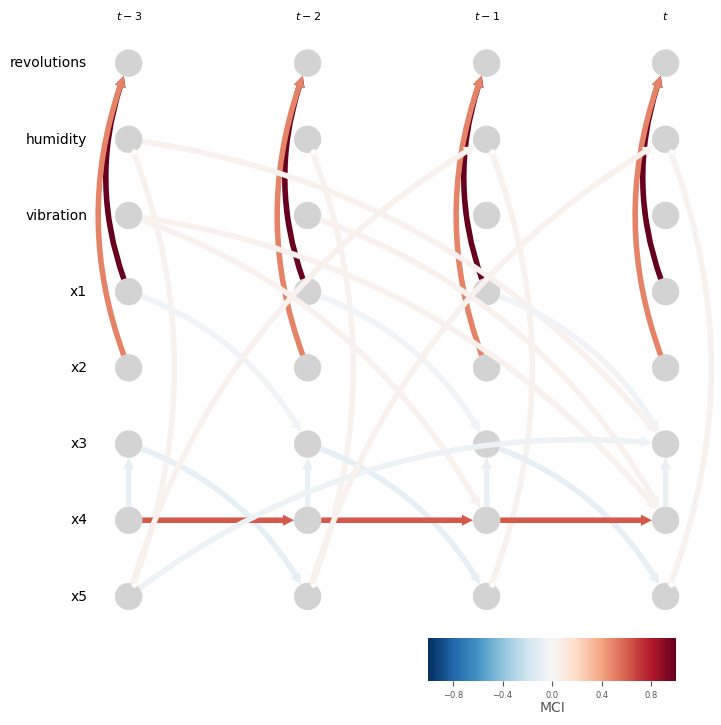

In [9]:
# Plot time series graph
tp.plot_time_series_graph(
    figsize=(8, 8),
    node_size=0.05,
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='MCI',
    ); plt.show()